In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Load your dataset 
data = pd.read_excel('dyscalculia new dataset.xlsx')

In [7]:
data.head()

,Student,Quick dot recognition,addition,subtraction,object divison,count apples,number line addition,pattern recognition,guess object count,number pattern,money question,object value assign,increse order,decrese order,length,Dyscalculia status
0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0
1,2,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0
2,3,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0
3,4,1,1,0,1,1,1,1,1,0,1,0,0,1,1,0
4,5,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0


In [8]:
# Basic dataset information
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Student                159 non-null    int64
 1   Quick dot recognition  159 non-null    int64
 2   addition               159 non-null    int64
 3   subtraction            159 non-null    int64
 4   object divison         159 non-null    int64
 5   count apples           159 non-null    int64
 6   number line addition   159 non-null    int64
 7   pattern recognition    159 non-null    int64
 8   guess object count     159 non-null    int64
 9   number pattern         159 non-null    int64
 10  money question         159 non-null    int64
 11  object value assign    159 non-null    int64
 12  increse order          159 non-null    int64
 13  decrese order          159 non-null    int64
 14  length                 159 non-null    int64
 15  Dyscalculia status 

In [9]:
print("\nDataset Summary:")
print(data.describe())


Dataset Summary:
          Student  Quick dot recognition    addition  subtraction  \
count  159.000000             159.000000  159.000000   159.000000   
mean    80.000000               0.974843    0.874214     0.647799   
std     46.043458               0.157097    0.332656     0.479165   
min      1.000000               0.000000    0.000000     0.000000   
25%     40.500000               1.000000    1.000000     0.000000   
50%     80.000000               1.000000    1.000000     1.000000   
75%    119.500000               1.000000    1.000000     1.000000   
max    159.000000               1.000000    1.000000     1.000000   

       object divison  count apples  number line addition  \
count      159.000000    159.000000            159.000000   
mean         0.792453      0.786164              0.761006   
std          0.406832      0.411308              0.427816   
min          0.000000      0.000000              0.000000   
25%          1.000000      1.000000              1.0000

In [10]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Student                  0
Quick dot recognition    0
addition                 0
subtraction              0
object divison           0
count apples             0
number line addition     0
pattern recognition      0
guess object count       0
number pattern           0
money question           0
object value assign      0
increse order            0
decrese order            0
length                   0
Dyscalculia status       0
dtype: int64


In [11]:
# Check for class distribution in the output variable
output_var = data.columns[-1]  # Assuming the last column is the target variable
print("\nClass Distribution in Output Variable:")
print(data[output_var].value_counts())


Class Distribution in Output Variable:
Dyscalculia status
0    115
1     44
Name: count, dtype: int64


Text(0.5, 1.0, 'Correlation Matrix')

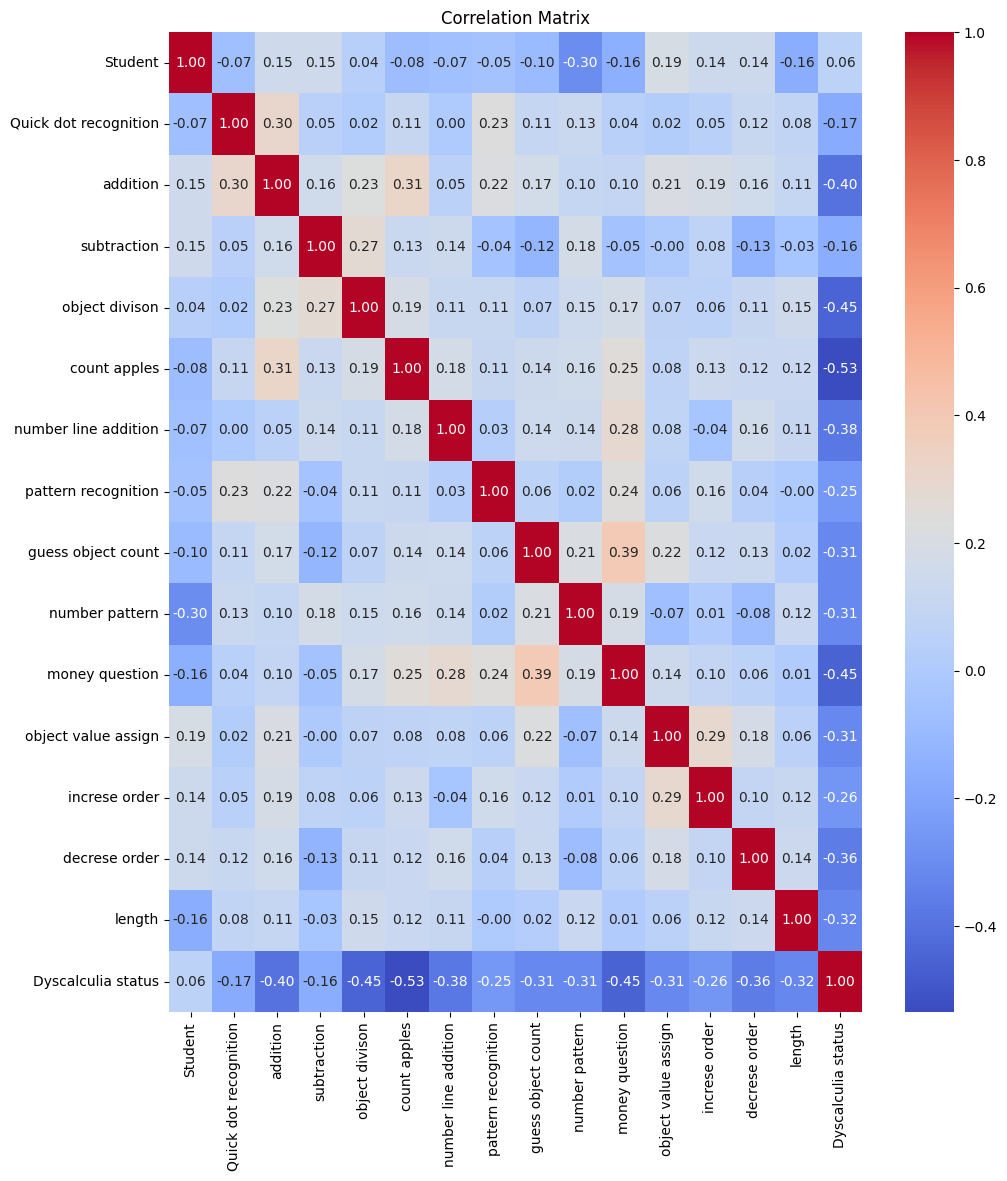

In [12]:
# Visualizations
plt.figure(figsize=(38, 28))

correlation_matrix = data.corr()

# Heatmap for Correlation Matrix
plt.subplot(2, 3, 1)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')

C:\Users\MSI\AppData\Local\Temp\ipykernel_14904\3208039255.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[output_var], palette='pastel')


Text(0, 0.5, 'Count')

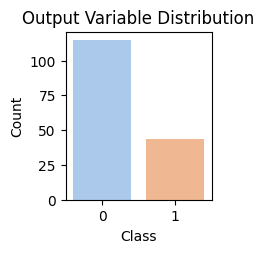

In [13]:
# Distribution of Output Variable
plt.subplot(2, 3, 2)
sns.countplot(x=data[output_var], palette='pastel')
plt.title('Output Variable Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

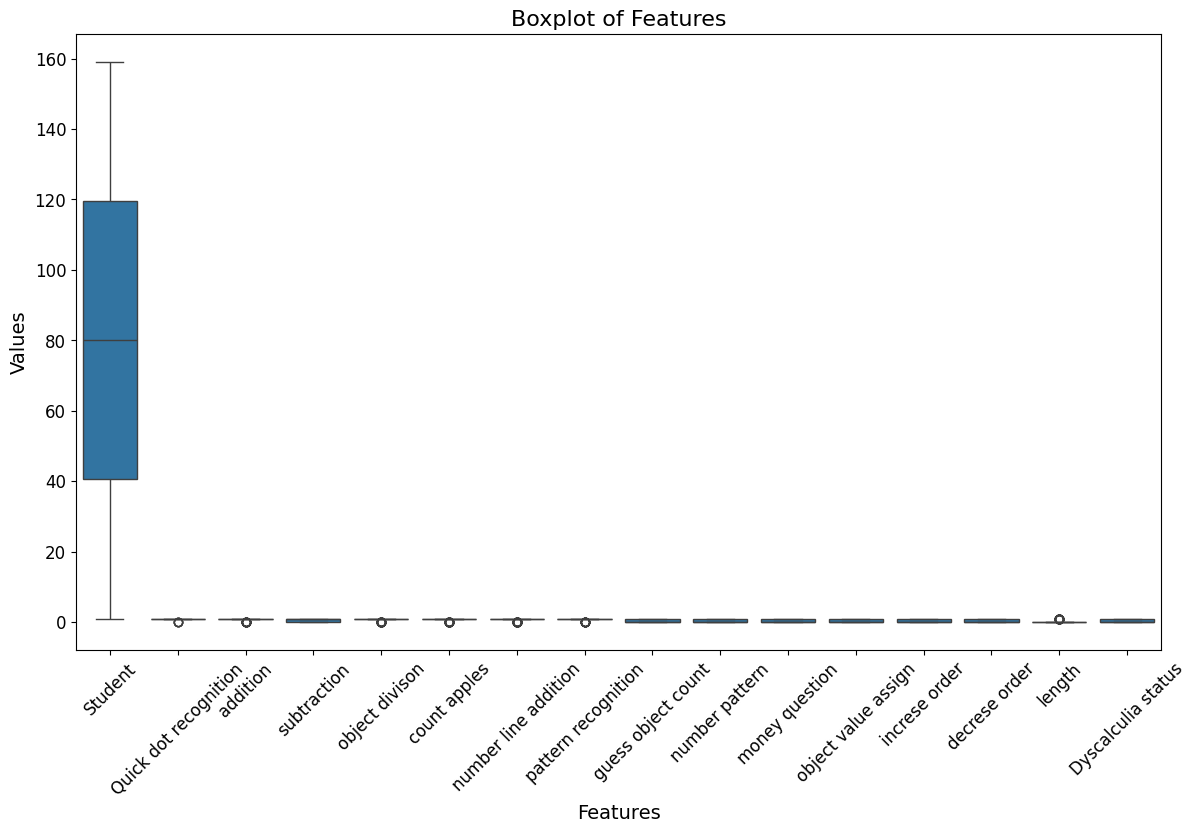

In [14]:
# Boxplot for feature distributions
plt.figure(figsize=(14, 8))  # Adjust the size of the figure
data_melted = data.melt(var_name='Feature', value_name='Value')
sns.boxplot(x='Feature', y='Value', data=data_melted)
plt.title('Boxplot of Features', fontsize=16)
plt.xticks(rotation=45, fontsize=12)  # Rotate and increase font size for x-axis labels
plt.yticks(fontsize=12)  # Increase font size for y-axis labels
plt.xlabel('Features', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.show()


C:\Users\MSI\AppData\Local\Temp\ipykernel_14904\489954243.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data[output_var], y=data.iloc[:, 0], palette='Set2')


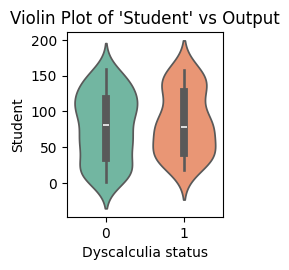

In [15]:
# Violin plot for distribution comparison
plt.subplot(2, 3, 6)
sns.violinplot(x=data[output_var], y=data.iloc[:, 0], palette='Set2')
plt.title(f"Violin Plot of '{data.columns[0]}' vs Output")

plt.tight_layout()
plt.show()

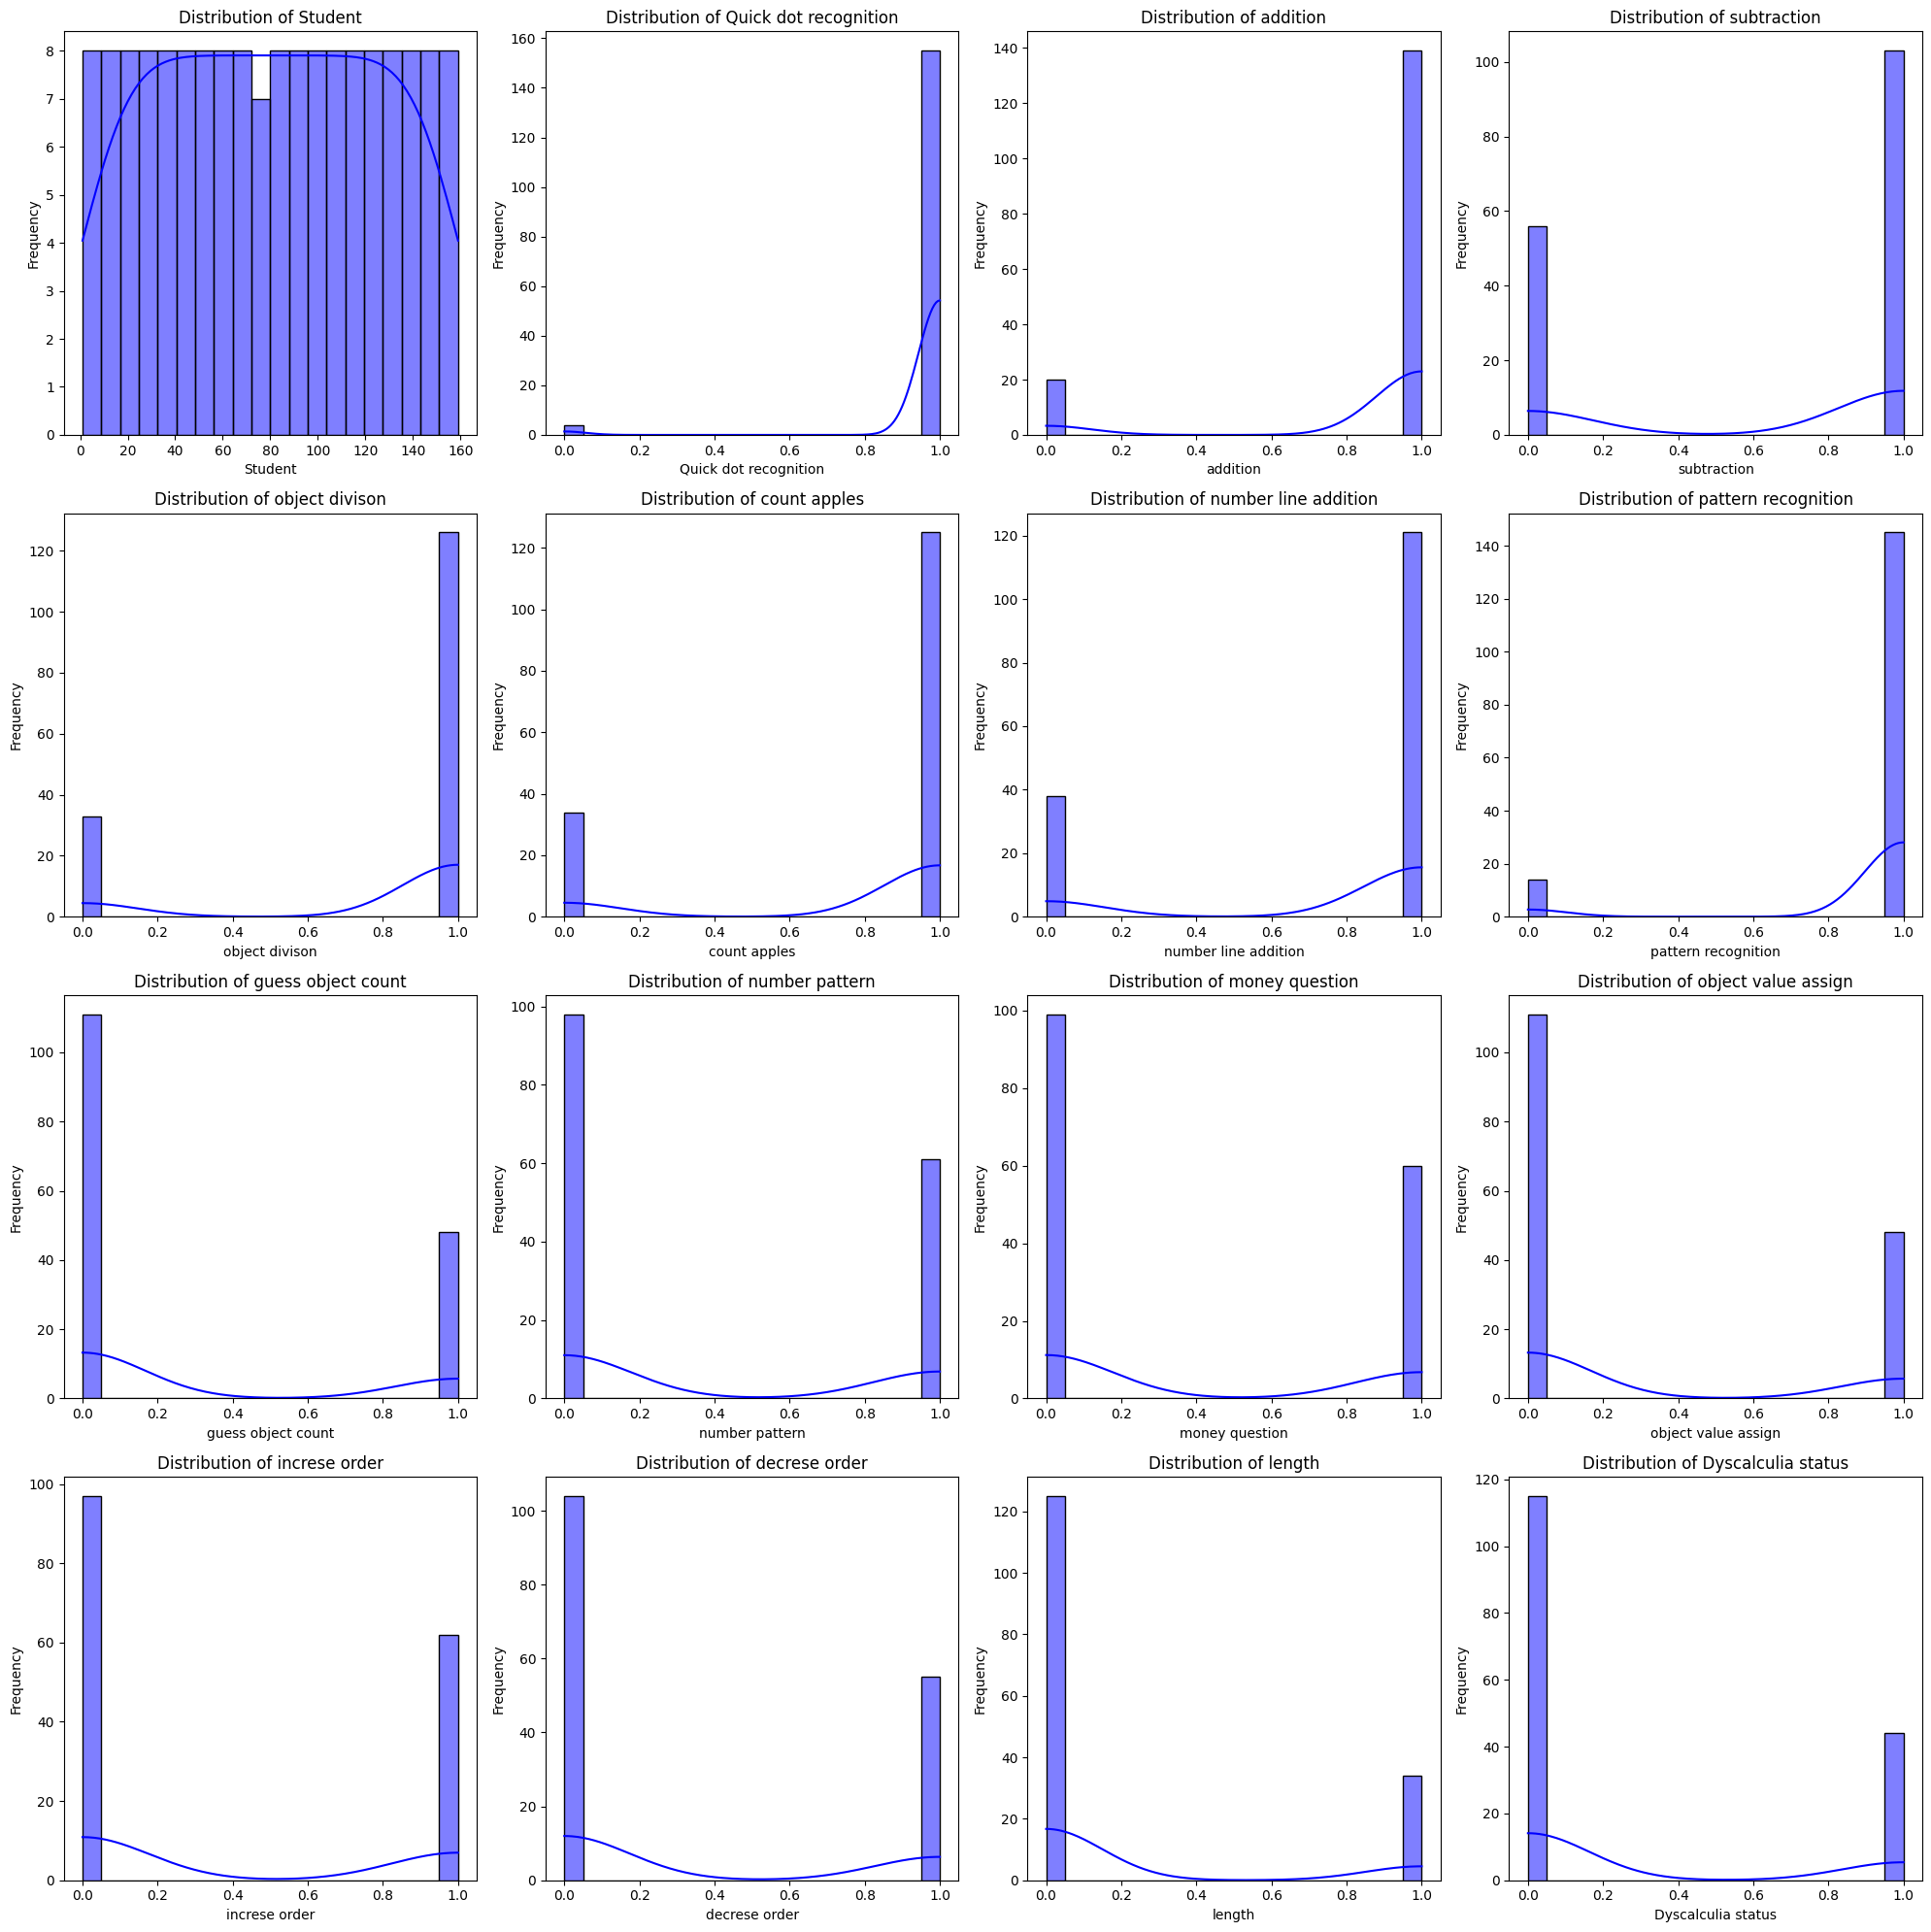

In [16]:
# Histograms for numeric features with 4 charts per row
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns

# Number of features
num_features = len(numeric_features)

# Define rows and columns for the grid
n_cols = 4  # 4 charts per row
n_rows = (num_features // n_cols) + (num_features % n_cols > 0)  # Calculate rows required

plt.figure(figsize=(20, 5 * n_rows))  # Adjust the figure size for better readability

for i, col in enumerate(numeric_features, 1):  # Start numbering plots from 1
    plt.subplot(n_rows, n_cols, i)  # Position in the grid
    sns.histplot(data[col], kde=True, color='blue', bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


In [18]:
# Exclude 'Student' column and the class variable (assuming it's the last column)
X = data.drop(columns=['Student', 'Dyscalculia status'])  # Replace 'ClassColumn' with the actual class column name
y = data['Dyscalculia status']  # Set the target variable to the actual class column

In [19]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# Initializing models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Classifier": SVC(probability=True)
}

In [21]:
# Training and evaluating models
best_model = None
best_accuracy = 0
best_model_name = ""
model_accuracies = {}  # Dictionary to store model accuracies

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    
    # Store accuracy for plotting
    model_accuracies[name] = accuracy
    
    # Save the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

Logistic Regression Accuracy: 0.9375
Random Forest Accuracy: 0.9167
Support Vector Classifier Accuracy: 0.9375


In [22]:
# Save the best model using pickle
if best_model:
    with open('best_model.pkl', 'wb') as f:
        pickle.dump(best_model, f)
    print(f"Best model '{best_model_name}' saved with accuracy {best_accuracy:.4f}")

Best model 'Logistic Regression' saved with accuracy 0.9375


C:\Users\MSI\AppData\Local\Temp\ipykernel_14904\334769326.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=accuracy_df, palette="viridis")


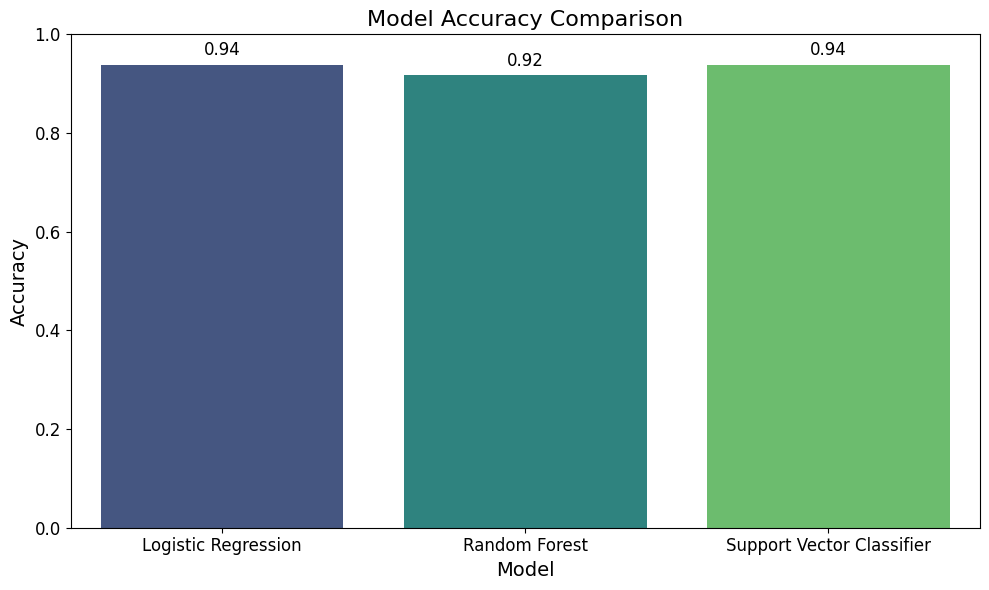

In [23]:
# Plot the accuracies
accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=["Model", "Accuracy"])

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=accuracy_df, palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy", fontsize=14)
plt.xlabel("Model", fontsize=14)
plt.ylim(0, 1)  # Set y-axis range from 0 to 1
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate the bars with accuracy values
for i, row in enumerate(accuracy_df.itertuples()):
    plt.text(i, row.Accuracy + 0.02, f"{row.Accuracy:.2f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

In [24]:
import pickle
import numpy as np

# Load the best model from the saved file
with open('best_model.pkl', 'rb') as f:
    best_model = pickle.load(f)

# Define column names
columns = [
    "Quick dot recognition",
    "addition",
    "subtraction",
    "object divison",
    "count apples",
    "number line addition",
    "pattern recognition",
    "guess object count",
    "number pattern",
    "money question",
    "object value assign",
    "increse order",
    "decrese order",
    "length"
]

# Define sample input as a dictionary (mentioning variable names)
sample_input = {
    "Quick dot recognition": 1,
    "addition": 0,
    "subtraction": 1,
    "object divison": 0,
    "count apples": 1,
    "number line addition": 0,
    "pattern recognition": 1,
    "guess object count": 1,
    "number pattern": 0,
    "money question": 1,
    "object value assign": 0,
    "increse order": 1,
    "decrese order": 1,
    "length": 0
}

# Convert the dictionary to a 2D array
# Ensure the order of features matches the model's training data
sample_values = np.array([list(sample_input.values())])

# Make predictions using the loaded model
predictions = best_model.predict(sample_values)

# Display the results
print("Sample Input:")
print(sample_input)
print("\nPredicted Output:")
print(predictions[0])  # Assuming binary classification, output will be 0 or 1


Sample Input:
{'Quick dot recognition': 1, 'addition': 0, 'subtraction': 1, 'object divison': 0, 'count apples': 1, 'number line addition': 0, 'pattern recognition': 1, 'guess object count': 1, 'number pattern': 0, 'money question': 1, 'object value assign': 0, 'increse order': 1, 'decrese order': 1, 'length': 0}

Predicted Output:
0


c:\Users\MSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
